In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()

# 1. Fashion MNIST

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Creating a extra dim so images can be feed into the CNN
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
n_classes = len(np.unique(y_train))

In [ ]:
# CNN
# Input layer
i = tf.keras.layers.Input(shape=X_train[0].shape)
# First convolution layer
x = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=(2,2),
    activation='relu'
) (i)
# Second convolution layer
x = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=(2,2),
    activation='relu'
) (x)
# Third convolution layer
x = tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(3,3),
    strides=(2,2),
    activation='relu'
) (x) 
# Flatten layer
x = tf.keras.layers.Flatten() (x)
# Fully connected network (ANN)
x = tf.keras.layers.Dropout(0.2) (x)
x = tf.keras.layers.Dense(
    units=512,
    activation='relu'
) (x)
x = tf.keras.layers.Dropout(0.2) (x)
x = tf.keras.layers.Dense(
    units=256,
    activation='relu'
) (x)
x = tf.keras.layers.Dropout(0.2) (x)
# Output layer
x = tf.keras.layers.Dense(
    units=n_classes,
    activation='softmax'
) (x)

model_mnist = tf.keras.models.Model(i, x)

In [ ]:
model_mnist.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656

In [ ]:
model_mnist.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
fit_mnist = model_mnist.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 40s 4ms/step - loss: 0.7361 - accuracy: 0.7335 - val_loss: 0.4099 - val_accuracy: 0.8453
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3948 - accuracy: 0.8506 - val_loss: 0.3797 - val_accuracy: 0.8578
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3325 - accuracy: 0.8746 - val_loss: 0.3354 - val_accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2945 - accuracy: 0.8889 - val_loss: 0.3279 - val_accuracy: 0.8819
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2685 - accuracy: 0.8971 - val_loss: 0.3066 - val_accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2519 - accuracy: 0.9046 - val_loss: 0.3122 - val_accuracy: 0.8899
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2293 - accuracy: 0.9134 - val_loss: 0.3068 - val_accuracy

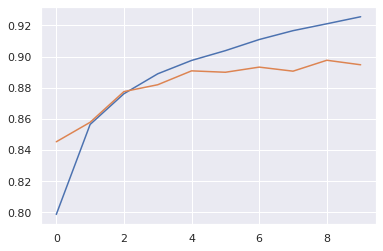

In [ ]:
plt.plot(fit_mnist.history['accuracy'])
plt.plot(fit_mnist.history['val_accuracy'])

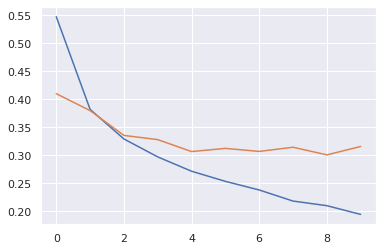

In [ ]:
plt.plot(fit_mnist.history['loss'])
plt.plot(fit_mnist.history['val_loss'])

# 2. CIFAR 10

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
# scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Flattening the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

In [7]:
n_classes = len(np.unique(y_train))

In [ ]:
# CNN
# Input layer
i = tf.keras.layers.Input(shape=X_train[0].shape)
# First convolution layer
x = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=(2,2),
    activation='relu'
) (i)
# Second convolution layer
x = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=(2,2),
    activation='relu'
) (x)
# Third convolution layer
x = tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(3,3),
    strides=(2,2),
    activation='relu'
) (x) 
# Flatten layer
x = tf.keras.layers.Flatten() (x)
# Fully connected network (ANN)
x = tf.keras.layers.Dropout(0.2) (x)
x = tf.keras.layers.Dense(
    units=1028,
    activation='relu'
) (x)
x = tf.keras.layers.Dropout(0.2) (x)
x = tf.keras.layers.Dense(
    units=256,
    activation='relu'
) (x)
x = tf.keras.layers.Dropout(0.2) (x)
# Output layer
x = tf.keras.layers.Dense(
    units=n_classes,
    activation='softmax'
) (x)

model_cifar10 = tf.keras.models.Model(i, x)

In [ ]:
model_cifar10.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
fit_cifar10 = model_cifar10.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10
)

In [ ]:
plt.plot(fit_cifar10.history['accuracy'])
plt.plot(fit_cifar10.history['val_accuracy'])

In [ ]:
plt.plot(fit_cifar10.history['loss'])
plt.plot(fit_cifar10.history['val_loss'])

# 3. CIFAR-10 Improved

Including data augmentation and improvements to the CIFAR-10 CNN

In [11]:
# CNN Improved architechture
# Input layer
i = tf.keras.layers.Input(shape=X_train[0].shape)

# First convolution group
x = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation='relu',
    padding='same'
) (i)
x = tf.keras.layers.BatchNormalization() (x)
x = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation='relu',
    padding='same'
) (x)
x = tf.keras.layers.BatchNormalization() (x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2)) (x)
# x = tf.keras.layers.Dropout(0.2) (x)

# Second convolution group
x = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3,3),
    activation='relu',
    padding='same'
) (x)
x = tf.keras.layers.BatchNormalization() (x)
x = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3,3),
    activation='relu',
    padding='same'
) (x)
x = tf.keras.layers.BatchNormalization() (x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2)) (x)
# x = tf.keras.layers.Dropout(0.2) (x)

# Third convolution group
x = tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(3,3),
    activation='relu',
    padding='same'
) (x)
x = tf.keras.layers.BatchNormalization() (x)
x = tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(3,3),
    activation='relu',
    padding='same'
) (x)
x = tf.keras.layers.BatchNormalization() (x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2)) (x)
# x = tf.keras.layers.Dropout(0.2) (x)

# Final ANN
x = tf.keras.layers.Flatten() (x)
x = tf.keras.layers.Dropout(0.2) (x)
x = tf.keras.layers.Dense(
    units=1024,
    activation='relu'
) (x)
x = tf.keras.layers.Dropout(0.2) (x)
x = tf.keras.layers.Dense(
    units=n_classes,
    activation='softmax'
) (x)

model_cifar10_better = tf.keras.models.Model(i, x)

In [12]:
model_cifar10_better.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        1849

In [13]:
model_cifar10_better.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
fit_cifar10_better = model_cifar10_better.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10
)

Epoch 1/10
1563/1563 [==============================] - 18s 7ms/step - loss: 1.7476 - accuracy: 0.4537 - val_loss: 1.0720 - val_accuracy: 0.6318
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8866 - accuracy: 0.6910 - val_loss: 0.8835 - val_accuracy: 0.6935
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6974 - accuracy: 0.7596 - val_loss: 0.7124 - val_accuracy: 0.7553
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5841 - accuracy: 0.7975 - val_loss: 0.6995 - val_accuracy: 0.7648
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4777 - accuracy: 0.8351 - val_loss: 0.6583 - val_accuracy: 0.7856
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3904 - accuracy: 0.8651 - val_loss: 0.6182 - val_accuracy: 0.7967
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3291 - accuracy: 0.8866 - val_loss: 0.6367 - val_ac

In [15]:
batch_size = 32

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = data_generator.flow(X_train, y_train, batch_size)

steps_per_epoch = X_train.shape[0] // batch_size

In [17]:
cifar10_gen_fit = model_cifar10_better.fit(
    train_generator,
    validation_data=(X_test, y_test),
    steps_per_epoch=steps_per_epoch,
    epochs=10
)

Epoch 1/10
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4788 - accuracy: 0.8372 - val_loss: 0.6022 - val_accuracy: 0.8071
Epoch 2/10
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4499 - accuracy: 0.8477 - val_loss: 0.5843 - val_accuracy: 0.8169
Epoch 3/10
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4402 - accuracy: 0.8509 - val_loss: 0.4805 - val_accuracy: 0.8431
Epoch 4/10
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4145 - accuracy: 0.8587 - val_loss: 0.4585 - val_accuracy: 0.8510
Epoch 5/10
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3956 - accuracy: 0.8648 - val_loss: 0.4993 - val_accuracy: 0.8455
Epoch 6/10
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3813 - accuracy: 0.8688 - val_loss: 0.4669 - val_accuracy: 0.8471
Epoch 7/10
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3657 - accuracy: 0.8743 - val_loss: 0.4313 -

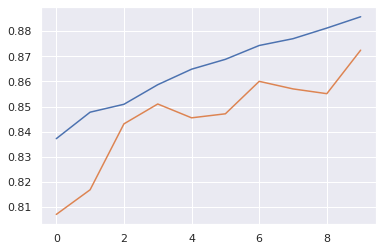

In [18]:

plt.plot(cifar10_gen_fit.history['accuracy'])
plt.plot(cifar10_gen_fit.history['val_accuracy'])

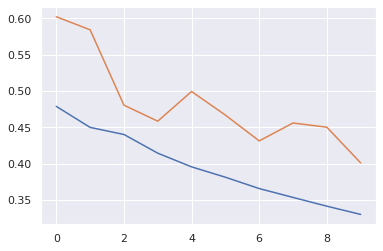

In [19]:
plt.plot(cifar10_gen_fit.history['loss'])
plt.plot(cifar10_gen_fit.history['val_loss'])